# 구글 플레이스토어 평점 및 다운로드 수 예측

- Kaggle에 있는 Google Playstore 데이터를 이용하여 데이터 결측치 처리 및 변수 변환 등 데이터를 전처리한 뒤 평점 예측 모델과 다운로드 수 예측 모델을 만든다. 

- Machine learning에서 필요한 scikit-learn(사이킷런) 라이브러리를 바탕으로 로지스틱 회귀모형, KNN, decision tree, random forest를 이용해 모델을 수립하였다.  
- 모델 수립 후, K-fold 교차 검증을 활용하여 정확도의 평균을 구하고, 가장 정확도가 높은 모델을 대표 모델로 선정한 뒤 실제로 예측한다.

In [1]:
# csv 에서 데이터를 읽어와 행렬 객체로 만들 수 있는 모듈
# 다양한 데이터 전처리
import pandas as pd
# 데이터를 학습용과 테스트용으로 나눌 수 있는 함수
from sklearn.model_selection import train_test_split
# 사용할 모델들
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
# KFold 교차 검증을 위한 모듈들
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np
import collections

# 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### 전처리한 데이터 읽어오기

In [2]:
data = pd.read_csv('final_data.csv')

# 1. 평점

##### 학습 데이터와 테스트 데이터를 7:3으로 나눈다

In [3]:
train_rating, test_rating = train_test_split(data, test_size=0.3)
train_rating.to_csv('train_rating.csv')
test_rating.to_csv('test_rating.csv')

##### 결과 데이터 추출

In [4]:
target_rating = train_rating['Rating']
target_rating = target_rating.astype(int)
train_rating = train_rating.drop(['App','Rating'], axis=1)

### 평점 예측 모델 선택

- KFold 교차 검증: K개의 Fold(랜덤으로 추출한 데이터 묶음)를 생성하여 지정된 모델 객체를 Fold의 수만큼 만든다.  
- 만들어진 모델들의 정확도의 평균을 최종 모델의 정확도로 반환한다

In [5]:
# 모델 객체 생성
model_rating_1 = LogisticRegression(C=1000.0, random_state=0)
model_rating_2 = KNeighborsClassifier(n_neighbors = 15)
model_rating_3 = DecisionTreeClassifier()
model_rating_4 = RandomForestClassifier(n_estimators=15)
model_rating_5 = GaussianNB()
model_rating_6 = SVC(C=1, kernel='rbf', coef0=1)
model_rating_7 = XGBClassifier()

# Fold 생성
folds = KFold(n_splits=10, shuffle=True, random_state=0)

# 교차 검증한다 (rating)
score_rating_1 = cross_val_score(model_rating_1, train_rating, target_rating, cv=folds, n_jobs=1, scoring='accuracy')
score_rating_2 = cross_val_score(model_rating_2, train_rating, target_rating, cv=folds, n_jobs=1, scoring='accuracy')
score_rating_3 = cross_val_score(model_rating_3, train_rating, target_rating, cv=folds, n_jobs=1, scoring='accuracy')
score_rating_4 = cross_val_score(model_rating_4, train_rating, target_rating, cv=folds, n_jobs=1, scoring='accuracy')
score_rating_5 = cross_val_score(model_rating_5, train_rating, target_rating, cv=folds, n_jobs=1, scoring='accuracy')
score_rating_6 = cross_val_score(model_rating_6, train_rating, target_rating, cv=folds, n_jobs=1, scoring='accuracy')
score_rating_7 = cross_val_score(model_rating_7, train_rating, target_rating, cv=folds, n_jobs=1, scoring='accuracy')

# 각 모델별 정확도 평균을 구한다 (rating)
avg_rating_1 = round(np.mean(score_rating_1) * 100, 2)
avg_rating_2 = round(np.mean(score_rating_2) * 100, 2)
avg_rating_3 = round(np.mean(score_rating_3) * 100, 2)
avg_rating_4 = round(np.mean(score_rating_4) * 100, 2)
avg_rating_5 = round(np.mean(score_rating_5) * 100, 2)
avg_rating_6 = round(np.mean(score_rating_6) * 100, 2)
avg_rating_7 = round(np.mean(score_rating_7) * 100, 2)

print('평점 정확도 평균: ', f'{avg_rating_1},{avg_rating_2},{avg_rating_3},{avg_rating_4},{avg_rating_5},{avg_rating_6},{avg_rating_7}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

평점 정확도 평균:  73.26,72.51,63.93,72.81,16.76,73.28,74.76


In [6]:
# 정확도 평균이 가장 높게 나온 modle7으로 학습
model_rating_7.fit(train_rating, target_rating)
print('학습완료')

학습완료


### 평점 예측 모델 사용하기

In [7]:
rating = test_rating['Rating']
category_rating = test_rating['Category']
test_rating = test_rating.drop(['App','Rating'],axis=1)
                  
# 예측 결과 계산
y_pred_rating = model_rating_7.predict(test_rating)

In [8]:
# 평점 예측 결과를 DataFrame로 만듬
rating_predictive_model = pd.DataFrame({'Category': category_rating, 'Rating':y_pred_rating})

In [9]:
# 카테고리로 group하여 예측한 평점의 평균을 반환
rating_predictive_model = round(rating_predictive_model.groupby(['Category'], as_index=False).mean(),1)
# 예측한 평점이 높은 순으로 정렬
rating_predictive_model = rating_predictive_model.sort_values('Rating', ascending=False)

In [10]:
# 데이터 전처리시 만들었던 category_map
category_map = {'ART_AND_DESIGN': 0, 'AUTO_AND_VEHICLES': 1, 'BEAUTY': 2, 'BOOKS_AND_REFERENCE': 3, 'BUSINESS': 4, 'COMICS': 5, 'COMMUNICATION': 6, 'DATING': 7, 'EDUCATION': 8, 'ENTERTAINMENT': 9, 'EVENTS': 10, 'FINANCE': 11, 'FOOD_AND_DRINK': 12, 'HEALTH_AND_FITNESS': 13, 'HOUSE_AND_HOME': 14, 'LIBRARIES_AND_DEMO': 15, 'LIFESTYLE': 16, 'GAME': 17, 'FAMILY': 18, 'MEDICAL': 19, 'SOCIAL': 20, 'SHOPPING': 21, 'PHOTOGRAPHY': 22, 'SPORTS': 23, 'TRAVEL_AND_LOCAL': 24, 'TOOLS': 25, 'PERSONALIZATION': 26, 'PRODUCTIVITY': 27, 'PARENTING': 28, 'WEATHER': 29, 'VIDEO_PLAYERS': 30, 'NEWS_AND_MAGAZINES': 31, 'MAPS_AND_NAVIGATION': 32}

# category_map의 key,value 값을 바꿈
inverse_category_map = {v: k for k, v in category_map.items()}

# 현재 카테고리가 숫자로 되어 있으므로 다시 문자로 변경
rating_predictive_model['Category'] = rating_predictive_model['Category'].map(inverse_category_map)
rating_predictive_model

,Category,Rating
16,LIFESTYLE,4.1
4,BUSINESS,4.1
21,SHOPPING,4.1
13,HEALTH_AND_FITNESS,4.1
26,PERSONALIZATION,4.1
2,BEAUTY,4.1
19,MEDICAL,4.1
30,VIDEO_PLAYERS,4.0
29,WEATHER,4.0
28,PARENTING,4.0


In [11]:
# 카테고리별 평점 예측 결과를 저장
rating_predictive_model.to_csv('rating_predictive_model.csv')

# 2. 다운로드 수 

##### 학습 데이터와 테스트 데이터를 7:3으로 나눈다

In [12]:
train_installs, test_installs = train_test_split(data, test_size=0.3)
train_installs.to_csv('train_installs.csv')
test_installs.to_csv('test_installs.csv')

##### 결과 데이터 추출

In [13]:
target_installs = train_installs['Installs']
target_installs = target_installs.astype(int)
train_installs = train_installs.drop(['App','Installs', 'Size'], axis=1)

### 다운로드 수 예측 모델 선택

In [14]:
# 모델 객체 생성
model_installs_1 = LogisticRegression(C=1000.0, random_state=0)
model_installs_2 = KNeighborsClassifier(n_neighbors = 15)
model_installs_3 = DecisionTreeClassifier()
model_installs_4 = RandomForestClassifier(n_estimators=15)
model_installs_5 = GaussianNB()
model_installs_6 = SVC(C=1, kernel='rbf', coef0=1)
model_installs_7 = XGBClassifier()

# Fold 생성
folds = KFold(n_splits=10, shuffle=True, random_state=0)

# 교차 검증한다 (installs)
score_installs_1 = cross_val_score(model_installs_1, train_installs, target_installs, cv=folds, n_jobs=1, scoring='accuracy')
score_installs_2 = cross_val_score(model_installs_2, train_installs, target_installs, cv=folds, n_jobs=1, scoring='accuracy')
score_installs_3 = cross_val_score(model_installs_3, train_installs, target_installs, cv=folds, n_jobs=1, scoring='accuracy')
score_installs_4 = cross_val_score(model_installs_4, train_installs, target_installs, cv=folds, n_jobs=1, scoring='accuracy')
score_installs_5 = cross_val_score(model_installs_5, train_installs, target_installs, cv=folds, n_jobs=1, scoring='accuracy')
score_installs_6 = cross_val_score(model_installs_6, train_installs, target_installs, cv=folds, n_jobs=1, scoring='accuracy')
score_installs_7 = cross_val_score(model_installs_7, train_installs, target_installs, cv=folds, n_jobs=1, scoring='accuracy')

# 각 모델별 정확도 평균을 구한다 (installs)
avg_installs_1 = round(np.mean(score_installs_1) * 100, 2)
avg_installs_2 = round(np.mean(score_installs_2) * 100, 2)
avg_installs_3 = round(np.mean(score_installs_3) * 100, 2)
avg_installs_4 = round(np.mean(score_installs_4) * 100, 2)
avg_installs_5 = round(np.mean(score_installs_5) * 100, 2)
avg_installs_6 = round(np.mean(score_installs_6) * 100, 2)
avg_installs_7 = round(np.mean(score_installs_7) * 100, 2)

print('다운로드 수 정확도 평균: ', f'{avg_installs_1},{avg_installs_2},{avg_installs_3},{avg_installs_4},{avg_installs_5},{avg_installs_6},{avg_installs_7}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

다운로드 수 정확도 평균:  43.97,46.9,45.37,51.51,35.39,17.06,54.14


In [15]:
# 정확도 평균이 가장 높게 나온 modle7으로 학습
model_installs_7.fit(train_installs, target_installs)
print('학습완료')

학습완료


### 다운로드 수 예측 모델 사용하기

In [16]:
installs = test_installs['Installs']
category_installs = test_installs['Category']
test_installs = test_installs.drop(['App','Installs','Size'],axis=1)
                  
# 예측 결과 계산
y_pred_installs = model_installs_7.predict(test_installs)

In [17]:
# 다운로드 수 예측 결과를 DataFrame로 만듬
installs_predictive_model = pd.DataFrame({'Category': category_installs, 'Installs':y_pred_installs})

In [18]:
# 카테고리로 group하여 예측한 다운로드 수의 평균을 반환
installs_predictive_model = round(installs_predictive_model.groupby(['Category'], as_index=False).mean())
# 예측한 다운로드 수가 높은 순으로 정렬
installs_predictive_model = installs_predictive_model.sort_values('Installs', ascending=False)

In [19]:
# 현재 카테고리가 숫자로 되어 있으므로 다시 문자로 변경
installs_predictive_model['Category'] = installs_predictive_model['Category'].map(inverse_category_map)
installs_predictive_model

,Category,Installs
6,COMMUNICATION,18226115.0
17,GAME,15116917.0
24,TRAVEL_AND_LOCAL,14609541.0
22,PHOTOGRAPHY,10871674.0
9,ENTERTAINMENT,8946774.0
30,VIDEO_PLAYERS,8539667.0
20,SOCIAL,7420408.0
27,PRODUCTIVITY,5391429.0
25,TOOLS,5065315.0
21,SHOPPING,4685837.0


In [20]:
# 카테고리별 다운로드 수 예측 결과를 저장
installs_predictive_model.to_csv('installs_predictive_model.csv')

In [2]:
rating_predictive_model = pd.read_csv('rating_predictive_model.csv')

In [3]:
installs_predictive_model = pd.read_csv('installs_predictive_model.csv')

### 평점 예측 모델과 다운로드 수 예측 모델 합치기

In [4]:
# 평점 예측 모델과 다운로드 수 예측 모델 합치기
predictive_model = pd.merge(rating_predictive_model,installs_predictive_model,on='Category')
predictive_model

,Unnamed: 0_x,Category,Rating,Unnamed: 0_y,Installs
0,16,LIFESTYLE,4.1,16,1112571.0
1,4,BUSINESS,4.1,4,1429999.0
2,21,SHOPPING,4.1,21,4685837.0
3,13,HEALTH_AND_FITNESS,4.1,13,3337230.0
4,26,PERSONALIZATION,4.1,26,2744486.0
5,2,BEAUTY,4.1,2,293342.0
6,19,MEDICAL,4.1,19,119964.0
7,30,VIDEO_PLAYERS,4.0,30,8539667.0
8,29,WEATHER,4.0,29,1858696.0
9,28,PARENTING,4.0,28,670786.0


In [22]:
# 평점/다운로드 수 예측 모델 저장
predictive_model.to_csv('final_predictive_model.csv')

##### 데이터 분석

In [8]:
predictive_model['Rating'].describe()

count    33.000000
mean      4.012121
std       0.059987
min       3.800000
25%       4.000000
50%       4.000000
75%       4.000000
max       4.100000
Name: Rating, dtype: float64

In [9]:
predictive_model['Installs'].describe()

count    3.300000e+01
mean     4.115469e+06
std      4.682479e+06
min      1.199640e+05
25%      1.166630e+06
50%      1.896547e+06
75%      5.065315e+06
max      1.822612e+07
Name: Installs, dtype: float64

### 예측모델 시각화

In [23]:
category_list = []
for c in predictive_model['Category']:
    category_list.append(c)

In [24]:
rating_list = []
for r in predictive_model['Rating']:
    rating_list.append(r)

In [25]:
installs_list = []
for i in predictive_model['Installs']:
    installs_list.append(i)

In [26]:
# 폰트 설정
font_name = 'c:/Windows/Fonts/NGULIM.TTF'
font_pro = fm.FontProperties(fname=font_name)
font_family = font_pro.get_name()

plt.rcParams['font.family'] = font_family

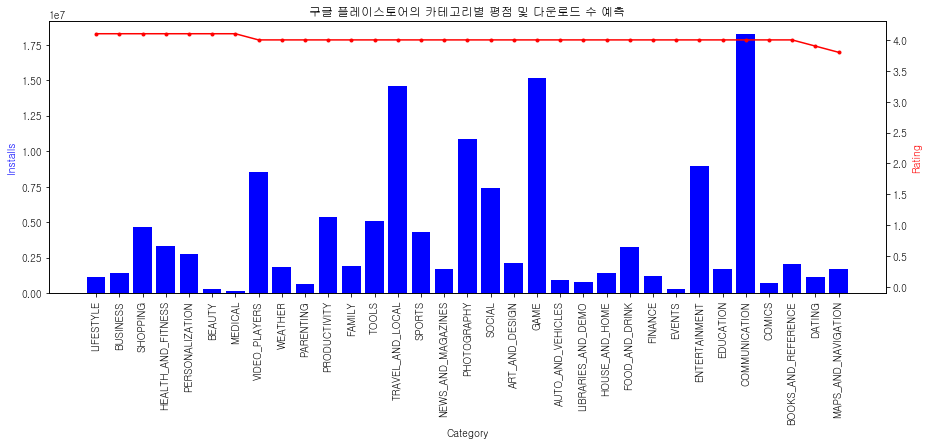

In [32]:
plt.figure(figsize=(15,5))
plt.title('구글 플레이스토어의 카테고리별 평점 및 다운로드 수 예측')
plt.xticks(rotation=90)
plt.xlabel('Category')

# 다운로드 수 그래프 그리기
plt.bar(category_list, installs_list, color='b')
plt.ylabel('Installs',color='b')

# y축 값을 다르게 하여 그래프 겹쳐 그리기
plt.twinx()

# 평점 그래프 그리기
plt.plot(category_list, rating_list, 'r.-', 0.1)
plt.ylabel("Rating",color='r')

# 그래프 저장
fig = plt.gcf()
fig.savefig('google_predictive_model.png', dpi=fig.dpi)